In [ ]:
import pandas as pd
import numpy as np


Upload csv file in Colab

In [ ]:
data = pd.read_csv("/content/Q1.csv")
data.head(40)


,S/N,Year,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
0,1,2019,40,1,2,0,Right,0,Upper inner,0,Benign
1,2,2019,39,1,2,0,Left,0,Upper outer,0,Benign
2,3,2019,45,0,4,0,Left,0,Lower outer,0,Benign
3,4,2019,26,1,3,0,Left,0,Lower inner,1,Benign
4,5,2019,21,1,1,0,Right,0,Upper outer,1,Benign
5,6,2019,50,0,5,1,Right,1,Lower outer,0,Malignant
6,7,2019,58,0,6,1,Right,1,Upper outer,0,Malignant
7,8,2019,21,1,3,0,Left,0,Upper inner,0,Benign
8,9,2019,35,1,4,0,Left,0,Upper outer,0,Benign
9,10,2019,42,1,2,0,Right,0,Lower outer,1,Benign


In [ ]:
n_samples = data.shape[0]
n_features = data.shape[1]
X = np.zeros((n_samples, n_features))


In [ ]:
Y = np.zeros(n_samples)



Delete rows with #

In [ ]:
def has_hash(row):
  return any(value == "#" for value in row.values)

df_filtered = data.loc[~data.apply(has_hash, axis=1)]

Modify strings to numbers

In [ ]:
df_filtered.loc[df_filtered['Breast'] == 'Right', 'Breast'] = 0
df_filtered.loc[df_filtered['Breast'] == 'Left', 'Breast'] = 1

df_filtered.loc[df_filtered['Diagnosis Result'] == 'Benign', 'Diagnosis Result'] = 0
df_filtered.loc[df_filtered['Diagnosis Result'] == 'Malignant', 'Diagnosis Result'] = 1

df_filtered.loc[df_filtered['Breast Quadrant'] == 'Upper inner', 'Breast Quadrant'] = 0
df_filtered.loc[df_filtered['Breast Quadrant'] == 'Lower inner', 'Breast Quadrant'] = 1
df_filtered.loc[df_filtered['Breast Quadrant'] == 'Upper outer', 'Breast Quadrant'] = 2
df_filtered.loc[df_filtered['Breast Quadrant'] == 'Lower outer', 'Breast Quadrant'] = 3
df_filtered.loc[df_filtered['Breast Quadrant'] == 'Upper outer ', 'Breast Quadrant'] = 2

delete unimportant Columns

In [ ]:
df_filtered.drop('S/N', axis=1, inplace=True)
df_filtered.drop('Year', axis=1, inplace=True)

change the data types to float

In [ ]:
X = df_filtered.iloc[:, :-1].to_numpy(dtype=np.float32)
Y = df_filtered.iloc[:, -1].to_numpy(dtype=np.float32)

Y


<ipython-input-7-d587ce9b31a9>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('S/N', axis=1, inplace=True)
<ipython-input-7-d587ce9b31a9>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop('Year', axis=1, inplace=True)


array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
       0.], dtype=float32)

normalise

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(X)

X = scaler.transform(X)
X

array([[0.421875  , 1.        , 0.07692308, ..., 0.        , 0.        ,
        0.        ],
       [0.40625   , 1.        , 0.07692308, ..., 0.        , 0.6666667 ,
        0.        ],
       [0.5       , 0.        , 0.23076925, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.140625  , 1.        , 0.        , ..., 0.        , 0.6666667 ,
        1.        ],
       [0.09375   , 1.        , 0.        , ..., 0.        , 0.33333334,
        1.        ],
       [0.578125  , 0.        , 0.23076925, ..., 0.        , 1.        ,
        1.        ]], dtype=float32)

<Axes: xlabel='Inv-Nodes', ylabel='Tumor Size (cm)'>

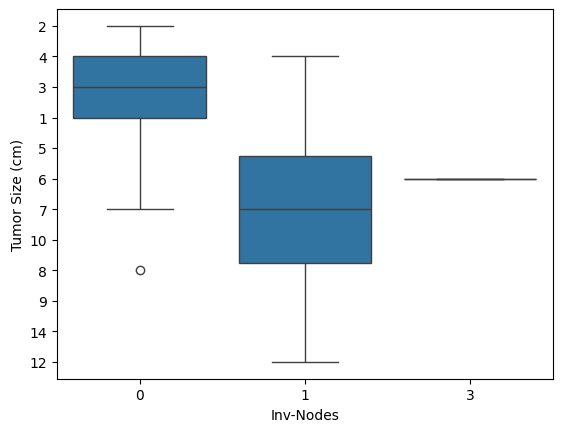

In [ ]:
import seaborn as sns
sns.boxplot(x="Inv-Nodes", y="Tumor Size (cm)", data=df_filtered)

<ipython-input-29-ffe3e5fb3af4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_filtered, x='Age', y='Breast Quadrant', inner='stick', palette='Dark2')


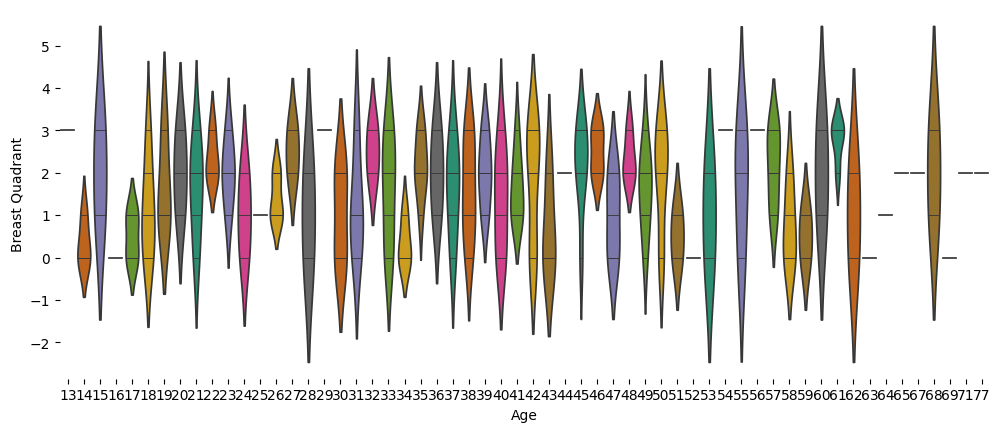

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_filtered['Breast Quadrant'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_filtered, x='Age', y='Breast Quadrant', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<Axes: xlabel='Age'>

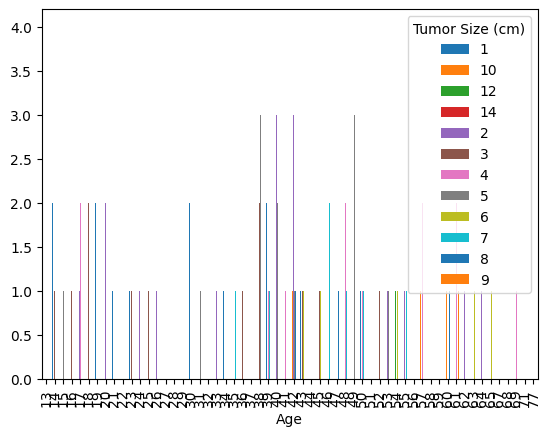

In [ ]:
df_filtered.groupby('Age')['Tumor Size (cm)'].value_counts().unstack().plot(kind='bar')

In [ ]:
df_filtered.corr().style.background_gradient()

,Age,Menopause,Tumor Size (cm),Inv-Nodes,Breast,Metastasis,Breast Quadrant,History,Diagnosis Result
Age,1.000000,-0.707227,0.504572,0.495718,-0.041296,0.475651,0.110054,0.180567,0.541728
Menopause,-0.707227,1.000000,-0.378699,-0.353838,0.069008,-0.392749,-0.091391,-0.099220,-0.375808
Tumor Size (cm),0.504572,-0.378699,1.000000,0.728929,-0.137738,0.701399,0.090786,0.200313,0.691806
Inv-Nodes,0.495718,-0.353838,0.728929,1.000000,-0.218604,0.881431,0.036590,0.216288,0.780151
Breast,-0.041296,0.069008,-0.137738,-0.218604,1.000000,-0.212610,0.031202,-0.020328,-0.109973
Metastasis,0.475651,-0.392749,0.701399,0.881431,-0.212610,1.000000,0.050738,0.164842,0.748280
Breast Quadrant,0.110054,-0.091391,0.090786,0.036590,0.031202,0.050738,1.000000,0.049178,0.029960
History,0.180567,-0.099220,0.200313,0.216288,-0.020328,0.164842,0.049178,1.000000,0.210764
Diagnosis Result,0.541728,-0.375808,0.691806,0.780151,-0.109973,0.748280,0.029960,0.210764,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

def logistic_regression(X, y, learning_rate=0.01, n_iters=1000, add_intercept=True):

  # Add intercept term if specified
  if add_intercept:
    ones = np.ones(shape=(X.shape[0], 1))
    X = np.concatenate((ones, X), axis=1)

  # Initialize weights with zeros
  weights = np.zeros(X.shape[1])

  # Data Partitioning
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

  # Training loop
  for _ in range(n_iters):
    # Calculate predictions
    predictions = 1 / (1 + np.exp(-np.dot(X_train, weights)))

    # Calculate errors
    errors = predictions - y_train

    # Update weights using gradient descent
    weights += learning_rate * np.dot(X_train.T, errors)

  # Extract weights and bias (last element of weights)
  bias = weights[-1]
  weights = weights[:-1]

  if add_intercept:
    return weights, weights[0]
  else:
    return weights

In [ ]:
print(logistic_regression(X,Y))

(array([4695.75309166, 1424.82586094, 4097.12038205,  737.34005384,
         32.78825065, 2797.81238957,  398.26041203, 2331.10949052]), 4695.753091656144)


In [ ]:
learning_rates = [0.001, 0.01, 0.1]
losses = []
for learning_rate in learning_rates:
  weights, loss = logistic_regression(X.copy(), Y.copy(), learning_rate)
  losses.append(loss)

# Simulate data for plotting decision boundaries (replace with your data if available)
x1 = np.linspace(0, 1, 200)
X_sim = np.c_[x1, np.ones(x1.shape) * 0.5]  # A line at y=0.5 for visualization

# Plot decision boundaries for different learning rates
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red']
for i, learning_rate in enumerate(learning_rates):
  weights, _ = logistic_regression(X.copy(), Y.copy(), learning_rate)
  y_pred = 1 / (1 + np.exp(-X_sim.dot(weights)))
  plt.plot(x1, y_pred, label=f'Learning Rate = {learning_rate}', color=colors[i])

# Scatter plot the original data points
plt.scatter(X[:, 0], Y, alpha=0.7, label='Data Points')

plt.xlabel('Feature 1')
plt.ylabel('Predicted Probability (y)')
plt.title('Logistic Regression Decision Boundaries with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

ValueError: shapes (200,2) and (8,) not aligned: 2 (dim 1) != 8 (dim 0)

<Figure size 1000x600 with 0 Axes>

In [ ]:

def calculate_metrics(y_true, y_pred):

  # Convert predictions to binary labels (0 or 1) based on a threshold
  y_pred = np.where(y_pred > 0.5, 1, 0)

  # Calculate precision
  precision = np.sum(y_true & y_pred) / np.sum(y_pred)

  # Calculate recall
  recall = np.sum(y_true & y_pred) / np.sum(y_true)

  # Calculate F1-score
  f1_score = 2 * (precision * recall) / (precision + recall)

  return precision, recall, f1_score

# Example usage
y_true = np.array([0, 1, 1, 0, 1])
y_pred = np.array([0.3, 0.7, 0.8, 0.2, 0.6])

precision, recall, f1_score = calculate_metrics(y_true, y_score)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Precision: Indicates the proportion of predicted positive cases that are truly positive.

Recall: Indicates the proportion of actual positive cases that are correctly identified by the model.

F1-Score: A harmonic mean of precision and recall, providing a balanced view of both metrics.